# MIS 382N: Business Data Science | Fall 2019

Homework One

Rutwick Bhawsar |
Shivang Arya

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


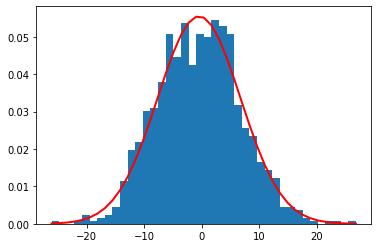

Mean :  -0.4713183398808911
Variance :  51.64365886053664


In [2]:
### Problem 1


### Creating a numpy array of 1000 samples with mean -10 and std. deviation 5
mu = -10
sigma = 5
arr1 = np.random.normal(mu,sigma, 1000)
arr2 = np.random.normal(-mu,sigma, 1000)

### Adding the two NumPy arrays and getting the mean and standard deviation for the purpose of plotting
arr3 = np.add(arr1,arr2)
mu = arr3.mean()
sigma = arr3.std()

### Plotting Histogram
count, bins, ignored = plt.hist(arr3, 40, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *            np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=2, color='r')
plt.show()

### Calculating and showing mean and variance
print("Mean : ",arr3.mean())
print("Variance : ",arr3.var())

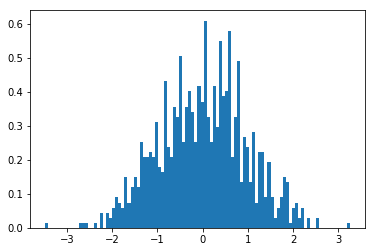

In [8]:
### Problem 2

def iid(n):
    temparr = [-1,1]
    arr1=np.random.choice(temparr,size = n)
    summ = np.sum(arr1)
    rootn = math.sqrt(n)
    z = summ/rootn
    return z

arr = np.array([])

for i in range(1000):
    zt=iid(5000)
    arr = np.append(arr,zt)  
    
plt.hist(arr,density="true",bins=100)
plt.show()

    

Mean :  0.08084793674503259
Mean with function for verification :  0.08084793674503259


Std. Deviation :  4.9977962497816675
Std. Deviation with function for verification :  4.9977962497816675


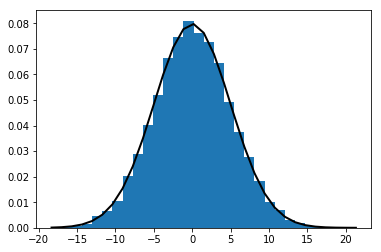

In [61]:
### Problem 3

mu = 0
sigma = 5
n = 25000
array = np.random.normal(mu,sigma,n)

mean = np.sum(array)/n
print("Mean : ",mean)
print("Mean with function for verification : ", np.mean(array))

stddev = np.sqrt(np.sum(np.subtract(array,mean)**2)/n)
print("\n\nStd. Deviation : ",stddev)
print("Std. Deviation with function for verification : ",np.std(array))


count, bins, ignored = plt.hist(array, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='black')
plt.show()



In [11]:
### Problem 4

import math
mu1 = -5
sigma1 = math.sqrt(20)
mu2 = 5
sigma2 = math.sqrt(30)
n = 10000
ar1 = np.random.normal(mu1,sigma1,n)
ar2 = np.random.normal(mu2,sigma2,n)

mean1 = np.sum(ar1)/n
mean2 = np.sum(ar2)/n

arr = np.array([ar1,ar2])

mean = (np.sum(arr)/(n*2))
print("Mean : ",mean)
print("Mean with function for verification : ",np.mean(arr))

covariancexy = (np.sum(np.subtract(ar1,mean1)*np.subtract(ar2,mean2))/n)
covariancexx = np.sum(np.subtract(ar1,mean1)**2)/n
covarianceyy = np.sum(np.subtract(ar2,mean2)**2)/n

covarr = np.array([[covariancexx,covariancexy], [covariancexy,covarianceyy]])

print("\nCovariance Array: \n", covarr)
print("\nCovariance with function for verification : \n",np.cov(arr))

Mean :  0.010484252462945733
Mean with function for verification :  0.010484252462945733

Covariance Array: 
 [[20.20768136 -0.30684038]
 [-0.30684038 30.06494902]]

Covariance with function for verification : 
 [[20.20970233 -0.30687106]
 [-0.30687106 30.06795581]]


In [4]:
### Problem 5

import pandas as pd

df = pd.read_csv('PatientData.csv',header=None)
df.head()

df2 = df #Backup

In [5]:
df = df2

In [6]:
### Question 5 Part a

print(df.shape)

(452, 280)


Answer : 452 Patients and 280 Features

In [8]:
### Question 5 Part b

df = df[[0,1,2,3]].describe()

In [9]:
df = df2
df = df.sort_values(2,ascending = False)


# Removing top 3 rows since we believe them to be Noise.
df = df[[0,1,2,3]]
df = df.iloc[3:]

print(df.describe())

# Finding the correlation between what we think is age and height in cms
print("\nThe correlation between what we think is age and height",df[0].corr(df[2]))

# Finding the correlation between what we think is age and weight in kgs
print("\nThe correlation between what we think is age and weight",df[0].corr(df[3]))

# Finding the correlation between what we think is height and weight
print("\nThe correlation between what we think is height and height",df[2].corr(df[3]))

                0           1           2           3
count  449.000000  449.000000  449.000000  449.000000
mean    46.612472    0.552339  163.783964   68.412027
std     16.176935    0.497808   10.350126   16.141449
min      1.000000    0.000000  105.000000   10.000000
25%     36.000000    0.000000  160.000000   59.000000
50%     47.000000    1.000000  164.000000   68.000000
75%     58.000000    1.000000  170.000000   79.000000
max     83.000000    1.000000  190.000000  176.000000

The correlation between what we think is age and height 0.23597361115095633

The correlation between what we think is age and weight 0.3515832087954388

The correlation between what we think is height and height 0.5744222640814031


In [204]:
df_gender=df[[0,1,2,3]].groupby(1).mean()
df_gender.head()

,0,2,3
1,,,
0,47.646766,169.049751,73.000000
1,45.774194,159.516129,64.693548


In [10]:
### Question 5 Part c.

# Load our DataFrame
df = df2

# Replace the missing value of '?' with np.nan
df = df[:].replace('?', np.nan)
#print(df.iloc[:,8:17].head(50))

print(df.columns[df.isna().any()].tolist())


df.iloc[:,10:15]=df.iloc[:,10:15].astype(float)
print("\n",df.iloc[:,10:15].describe())


#Replace the NaN with the mean of the column
df = df.fillna(df.mean(axis = 0, skipna = True))
print("\n",df.iloc[:,10:15].describe())
print("\n",df.columns[df.isna().any()].tolist())

# Storing the df in another one for use in the ext question
dfpca = df

[10, 11, 12, 13, 14]

                10          11          12          13          14
count  444.000000  430.000000  451.000000   76.000000  451.000000
mean    36.150901   48.913953   36.716186  -13.592105   74.463415
std     57.858255   29.346409   36.020725  127.220248   13.870684
min   -177.000000 -170.000000 -135.000000 -179.000000   44.000000
25%     14.000000   41.000000   12.000000 -124.500000   65.000000
50%     41.000000   56.000000   40.000000  -50.500000   72.000000
75%     63.250000   65.000000   62.000000  117.250000   81.000000
max    179.000000  176.000000  166.000000  178.000000  163.000000

                10          11          12          13          14
count  452.000000  452.000000  452.000000  452.000000  452.000000
mean    36.150901   48.913953   36.716186  -13.592105   74.463415
std     57.342803   28.621694   35.980768   51.879836   13.855298
min   -177.000000 -170.000000 -135.000000 -179.000000   44.000000
25%     14.000000   41.000000   12.000000  -13.5921

In [33]:
# Importing PCA 
from sklearn.decomposition import PCA 
df = dfpca
dfnew = df[df.columns[:-1]]
# We extracted 7 components
pca = PCA(n_components = 7) 
pca
fitted=pca.fit_transform(dfnew) 
#x_pca = pca.transform(scaled_data) 
  
# print(x_pca.shape)
x=pca.components_.T
df1 = pd.DataFrame(x)
print(df1.head())
print('\n\nExplained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# maxInColumns = np.amax(x, axis=0)

# result = np.where(x == np.amax(x, axis=0))
# print('Max value of every column: ', maxInColumns)
# print('Max value of every column: ', result)

for i in range(7):
    print(df1.abs().nlargest(10, i).ix[:,i])

          0         1         2         3         4         5         6
0  0.053869  0.013585  0.042164  0.040194  0.022690 -0.033984 -0.071834
1 -0.000533 -0.000087  0.001211 -0.000229 -0.000683  0.000842 -0.002115
2 -0.012909 -0.000743 -0.046777 -0.107262  0.028098  0.046692 -0.092713
3  0.029053 -0.011884  0.028726  0.033573  0.071929  0.003998 -0.009892
4  0.041787  0.037179 -0.004597  0.058284  0.056158 -0.019898  0.227163


Explained variation per principal component: [0.15483231 0.10037163 0.09326685 0.08506971 0.05279957 0.04976286
 0.04621334]
9      0.444101
12     0.304357
258    0.230049
13     0.219637
248    0.174143
40     0.172996
187    0.170934
268    0.168230
257    0.167627
64     0.165991
Name: 0, dtype: float64
248    0.412920
247    0.359566
238    0.280934
258    0.275508
9      0.233015
237    0.231531
257    0.227784
12     0.169661
87     0.168476
99     0.160766
Name: 1, dtype: float64
10     0.684436
13     0.411592
12     0.238713
5      0.198642
56     0.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [44]:
dfultimate=df.iloc[:,-1]

In [36]:
print(fitted)
principal_new = pd.DataFrame(data = fitted, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])
principal_new

[[ 32.71206171 -35.82110822  45.83880108 ...  61.50800885  -6.51162389
  -32.63337753]
 [ -9.81147863  -9.61918638  24.04521897 ...  -7.54974847  16.37893744
  -41.057002  ]
 [-72.61949897  23.04327559 -98.00694792 ...  45.68318464  17.3728025
  128.27301004]
 ...
 [340.01098805  78.82756683 -30.22167134 ...  71.74494643  30.47006568
   42.64733637]
 [-38.81014622 -62.51954261  -4.68783516 ... -15.81833782 138.13618889
   33.56570249]
 [-39.65933151 -70.64660273 -27.25008652 ... -43.6920239   -6.65539051
   -3.13794766]]


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,32.712062,-35.821108,45.838801,15.276055,61.508009,-6.511624,-32.633378
1,-9.811479,-9.619186,24.045219,25.727460,-7.549748,16.378937,-41.057002
2,-72.619499,23.043276,-98.006948,-72.093470,45.683185,17.372803,128.273010
3,10.230763,-48.173107,29.142867,50.251214,72.729612,-0.653305,19.941414
4,47.995382,-28.980950,29.100665,-12.794413,41.062773,-8.905969,-21.810897
5,-104.013522,169.411578,-94.149530,31.509676,-3.947101,13.798762,48.412344
6,-27.127933,49.560860,-27.407973,-9.834545,-44.549169,4.054703,-14.595423
7,-15.972302,48.149912,23.891734,-49.190753,-122.948828,47.449451,49.975615
8,-23.713266,-7.602419,-73.910951,-1.341418,-50.433647,86.614372,-12.394695
9,-75.624734,31.027837,-35.332997,-34.635360,-16.708726,4.698701,48.091979


In [43]:
from sklearn import linear_model 
regr = linear_model.LinearRegression()
regr.fit(principal_new, dfultimate)
predicted = regr.predict(principal_new)
mse = np.mean((predicted-dfultimate)**2)
print (regr.intercept_, regr.coef_,mse) 
print(regr.score(principal_new, dfultimate))

3.880530973451327 [ 0.00131832  0.00610902 -0.00407609 -0.00123462 -0.00458422 -0.00024039
  0.03308703] 16.844482251106612
0.1308107001739479


What we understand here is that the 7th Principal Component has the most effect on the independent variable by a large extent ( coefficient of regression is more than 10 times higher than the other principal components).

Hence, we choose the three features that affect Principal Component 7 the most:
1. Feature 7 in Python (8th column in CSV)
2. Feature 56 in Python (57th column in CSV)
3. Feature 5 in Python (6th column in CSV)